<a href="https://colab.research.google.com/github/sundeep443/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Topic To Project**

---

* Introduction to data - [Done]- Anupam
* Importing libraries - [Done] - Anupam
* Importing dataset - [Done] -Anupam
* Basic Data Exploration(Understanding the Dataset) - [Inprogress] - Anupam
* Data Cleaning - [Inprogress] - Aswin
  * Checking for null values
  * Delete data duplicated
  * Check Qutliers
* Exploratory Data Analysis (EDA) - [To Do] - For All
  * Sentiment analysis of user reviews - [To Do] - Aditya
* Check Co-relation - [To Do]
* CONCLUSION - [To Do] - This at the End of coding
* Visualization - [Inprogress] - Anupam
* Modularity of code - [To Do]


# Mounted Google Drive

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Introduction to data**

---



**datasets/apps.csv**

This file contains all the details of the apps on Google Play. There are 9 features that describe a given app.
* **App:** Name of the app
* **Category**: Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.
* **Rating:** The current average rating (out of 5) of the app on Google Play
* **Reviews:** Number of user reviews given on the app
* **Size:** Size of the app in MB (megabytes)
* **Installs: **Number of times the app was downloaded from Google Play
* **Type:** Whether the app is paid or free
* **Price:** Price of the app in US$
* **Last Updated:** Date on which the app was last updated on Google Play

**datasets/user_reviews.csv**

This file contains a random sample of 100 [most helpful first](https://play.google.com/about/comment-posting-policy/) user reviews for each app. The text in each review has been pre-processed and passed through a sentiment analyzer.
* **App:** Name of the app on which the user review was provided. Matches the `App` column of the `apps.csv` file
* **Review:** The pre-processed user review text
Sentiment Category: Sentiment category of the user review - Positive, Negative or Neutral
* **Sentiment Score:** Sentiment score of the user review. It lies between [-1,1]. A higher score denotes a more positive sentiment.



# **Importing libraries**

---






In [ ]:
#import library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

# **Importing Dataset**

---

In [ ]:
play_store_data = '/content/drive/MyDrive/Colab Notebooks/Project_folder/Play Store Data.csv'
user_reviews = '/content/drive/MyDrive/Colab Notebooks/Project_folder/User Reviews.csv'
#path_aswin = '/content/drive/MyDrive/Colab Notebooks/Capstone EDA/Play Store Data.csv'

apps = pd.read_csv(play_store_data) 
#review = pd.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_prakhar = '/content/drive/MyDrive/Playstore/' 
play_store_data = pd.read_csv(path_prakhar + 'Play Store Data.csv')
user_reviews = pd.read_csv(path_prakhar + 'User Reviews.csv')
apps = play_store_data

**Sentiment Polarity - Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e., it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.**

**Columns to use**

# **Basic Data Exploration(Understanding the Dataset)**

---

**We will check the below things:**
* head of the dataset
* tail of the dataset
* the shape of the dataset
* datatypes for every column
* summary of the dataset

## **head of the dataset**

In [ ]:
apps.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## **tail of the dataset**


In [ ]:
apps.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


## **the shape of the dataset**


In [ ]:
# Take a sample of 5
apps.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7869,POCKET ATLAS OF CT HEAD,MEDICAL,4.3,22,18M,"10,000+",Free,0,Everyone,Medical,"March 16, 2018",2.0,4.0.3 and up
5931,Sufara.ba,FAMILY,4.9,285,25M,"10,000+",Free,0,Everyone,Education,"January 5, 2018",1.0.5,4.4 and up
69,Used cars for sale - Trovit,AUTO_AND_VEHICLES,4.2,52530,7.0M,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 16, 2018",4.47.3,4.0.3 and up
5782,AXE.IO - Brutal Survival Battleground,GAME,4.2,3845,76M,"500,000+",Free,0,Everyone 10+,Arcade,"August 3, 2018",1.6.1,4.1 and up
7401,Mesure CI,TOOLS,NaN,9,6.6M,500+,Free,0,Everyone,Tools,"October 4, 2016",1.0.1,4.0 and up


In [ ]:
# Take a data shape (No. of rows and column in dataset)
apps.shape

(10841, 13)

In [ ]:
apps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


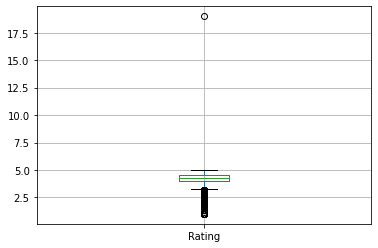

In [ ]:
#Box Plot Analysis and histogram to check is there any outliers in our data and what is the average rating in our data.
apps.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65f2ca7dd0>]],
      dtype=object)

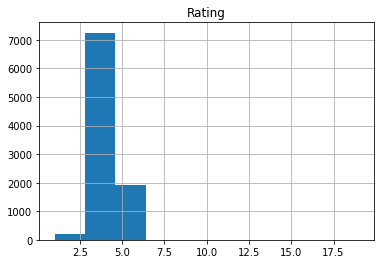

In [ ]:
apps.hist()

## **datatypes for every column**


In [ ]:
#Get the colums info
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## **summary of the dataset**

In [ ]:
#The described method will help to see how data has been spread for numerical values.
# We can clearly see the minimum value, mean values, different percentile values, and maximum values.
apps.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367,NaN,NaN,NaN,4.19334,0.537431,1,4,4.3,4.5,19
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
apps.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Data Cleaning

---



Dataset can contain missing data, numerical string value, various cues. Working with an uncleaned data could lead to unexpected errors and might make the conclusions drawn from the analysis skewed. So its always a good practise to clean the data first and it also makes the analysis easier. 

To clean the data we are going through the dataset by each column. First we will dsiplay all the distinct values in each column using unique() and see if there are any anomalies. Then we can make sure the datatype of each column is right for our analysis, if not we can convert it to required data type using astype(). After taking care of that we can look for null values and duplicated data. So lets start with category column first.

#Check sum of Null values:

In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

As we can check there were 1474 null values in Ratings and in other as mentioned above no. also. 

**In Boxplot we have checked that we have some outliars so we will start the data cleaning Category wise now**

## **Category**




**displaying all the distinct categories of apps in the data set**

In [ ]:
apps["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

There is category value as '1.9' which looks like a wrong entry. So let us find out which row it corresponds to

In [ ]:
#displaying rows that has category value as "1.9"
apps[apps['Category'] == '1.9']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


It looks like the a category column entry was missed in the 10472nd row and the rating got stored instead as category and so on. So lets just shift the whole data in the row towards right by one column and then store NaN value in category column

In [ ]:
apps.loc[10472] = apps.loc[10472].shift()
apps['App'].loc[10472] = apps['Category'].loc[10472]
apps['Category'].loc[10472] = np.nan
apps.loc[10472].reset_index()

,index,10472
0,App,Life Made WI-Fi Touchscreen Photo Frame
1,Category,NaN
2,Rating,1.9
3,Reviews,19
4,Size,3.0M
5,Installs,"1,000+"
6,Type,Free
7,Price,0
8,Content Rating,Everyone
9,Genres,NaN


In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10841 non-null  object
 1   Category        10840 non-null  object
 2   Rating          9367 non-null   object
 3   Reviews         10841 non-null  object
 4   Size            10841 non-null  object
 5   Installs        10841 non-null  object
 6   Type            10840 non-null  object
 7   Price           10841 non-null  object
 8   Content Rating  10841 non-null  object
 9   Genres          10840 non-null  object
 10  Last Updated    10841 non-null  object
 11  Current Ver     10833 non-null  object
 12  Android Ver     10839 non-null  object
dtypes: object(13)
memory usage: 1.1+ MB


## **Lets convert Rating, Size, Reviews, Installs and Price from object to numeric types**

We can see here the data types of all columns is object. So let us convert the data types of :
* **rating** 
* **size** 
* **reviews** 
* **installs** 
* **price**

to numerics types. This will let us do comparisons on the data set. 

**Rating**

In [ ]:
#Outliars in Rating which were having Rating greater than 5.0.(Faulty Data)
apps[apps.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
apps.drop([10472], inplace=True)

We have dropped the faulty rating. Now we can check if the same is there in the data set or not.

In [ ]:
apps[10470:10476]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up


**As we can see the outliar is removed now we can verify the same from the boxplot again**

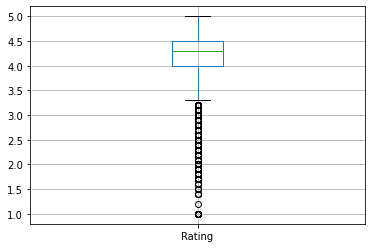

In [ ]:
apps.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41bde0df10>]],
      dtype=object)

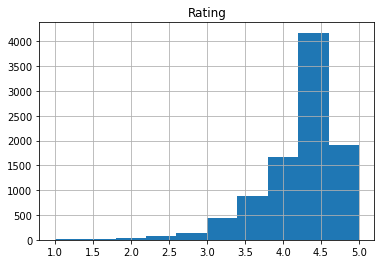

In [ ]:
apps.hist()

In [ ]:
apps['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [ ]:
#convterting Rating from object to float using astype()
apps['Rating'] = apps['Rating'].astype(float)

In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Reviews**



In [ ]:
#displaying all distinct values in Reviews
apps['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
#converting reviews from object to integer
apps["Reviews"] = apps["Reviews"].astype(int)

In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


**Size**

Lets first take a peak of the data stored in size column

In [ ]:
apps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

We can be seen that data has metric prefixes (Kilo and Mega) along with another string. So lets Replace k and M with their values to convert values to numeric.

In [ ]:
apps['Size']=apps['Size'].str.replace('M','000')
apps['Size']=apps['Size'].str.replace('k','')
apps['Size']=apps['Size'].replace("Varies with device",np.nan)


In [ ]:
#Converting Size to float type using astype()
apps['Size']=apps['Size'].astype(float)
apps['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10841, dtype: float64

Now all the values are in kilos, we can convert this into mega values which will make it more easier to handle.

In [ ]:
#first converting all millions values with floating points in them into thpusands(one which were less than 10)
for i in apps['Size']:
    if i < 10:
        apps['Size']=apps['Size'].replace(i,i*1000)
#now converting every value back to mega
apps['Size']=apps['Size']/1000
apps['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10841, dtype: float64

**Installs and Price**

In [ ]:
#displaying values in Install
apps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
#displaying values in Price
apps['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

We can remove '$' sign in Price column data and plus(+) and comma signs in Installs column. To do this create a list "items_to_remove" and add these signs to it. And also create another list "cols_to_clean" with names of both the columns we want to clean. Then iterate through these columns using each of the signs in the "items_to_remove" list. We can do this by making use of nested for loops.

In [ ]:
#list to store items to remove
items_to_remove=['+',',','$']
#list to store labels of columns to clean
cols_to_clean=['Installs','Price']
#nested for loop
for item in items_to_remove:
    for col in cols_to_clean:
        apps[col]=apps[col].str.replace(item,'')
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#converting Installs and Price to integer and float data type
apps['Installs']=apps['Installs'].astype(int)
apps['Price']=apps['Price'].astype(float)

In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


**Last Updated**

Late Updated can be converted from object to date data type

In [ ]:
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'])
apps['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10841, dtype: datetime64[ns]

We can also replace updated date with three new columns, namely updated day , month and year so that more exclusive analysis can be done on this data.

In [ ]:
apps['Updated_Day']=apps['Last Updated'].dt.day
apps['Updated_Month']=apps['Last Updated'].dt.month
apps['Updated_Year']=apps['Last Updated'].dt.year
apps.drop('Last Updated', axis=1, inplace=True)
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Day,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10839 non-null  object 
 12  Updated_Day     10841 non-null  int64  
 13  Updated_Month   10841 non-null  int64  
 14  Updated_Year    10841 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.2+ MB


##**Data Manipulation : Checking for null values**

In [ ]:
null = pd.DataFrame({'Null Values' : apps.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (apps.isna().sum().sort_values(ascending=False)) / (apps.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
Last Updated,0,0.000000
Genres,0,0.000000
Content Rating,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000


<BarContainer object of 13 artists>

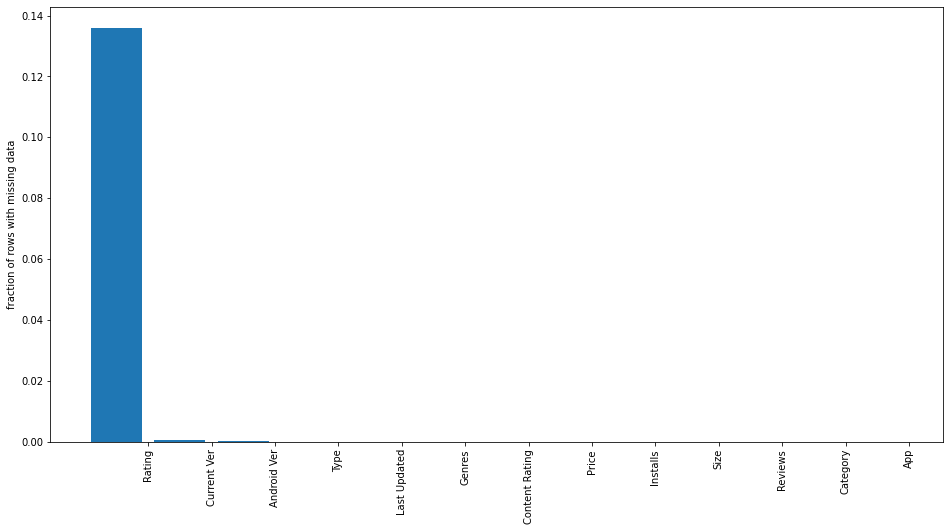

In [ ]:
null_counts = apps.isna().sum().sort_values(ascending=False)/len(apps)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [ ]:
#We can replace the null values in rating  with mean of ratings

In [ ]:
#replacing nan values using mean()
apps['Rating'] = apps.Rating.replace(np.nan,apps['Rating'].mean())
apps['Size'] = apps.Size.replace(np.nan,apps['Size'].mean())

TypeError: ignored

In [ ]:
del null
null = pd.DataFrame({'Null Values' : apps.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (apps.isna().sum().sort_values(ascending=False)) / (apps.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
Last Updated,0,0.000000
Genres,0,0.000000
Content Rating,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000
Reviews,0,0.000000


**Clearing the other Null values**

In [ ]:
print(apps['Current Ver'].mode())
print(apps['Android Ver'].mode())
print(apps['Type'].mode())

0    Varies with device
dtype: object
0    4.1 and up
dtype: object
0    Free
dtype: object


In [ ]:
apps['Current Ver'].fillna(str(apps['Current Ver'].mode().values[0]),inplace = True)
apps['Android Ver'].fillna(str(apps['Android Ver'].mode().values[0]),inplace = True)
apps['Type'].fillna(str(apps['Type'].mode().values[0]),inplace = True)

In [ ]:
apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

As we can see all the null values were now cleaned.

## **Deletion of duplicated data**

In [ ]:
duplicate = apps.duplicated()
print(duplicate.sum())

483


In [ ]:
apps.drop_duplicates(inplace=True)

In [ ]:
duplicate = apps.duplicated()
print(duplicate.sum())

0


In [ ]:
#Write code here

# **Exploratory Data Analysis (EDA)**

---
* Top 3 of Paid category apps (by category) in the play store:
* Reviews vs Category Graph
* Content Rating
* Distribution of app rating
* Distribution of paid and free apps in each category
* Sentiment Analysis of User Reviews
* Distribution of apps in terms of categries





**Top 3 of Paid category apps (by category) in the play store:**

## **Plotting the Reviews vs Category graph**

In [ ]:
category_list = list(apps['Category'].unique())
category_review = []
for i in category_list:
    x = apps[apps['Category'] == i]
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)

In [ ]:
#sorting
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (data_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data =data_category_reviews.reindex(new_index)

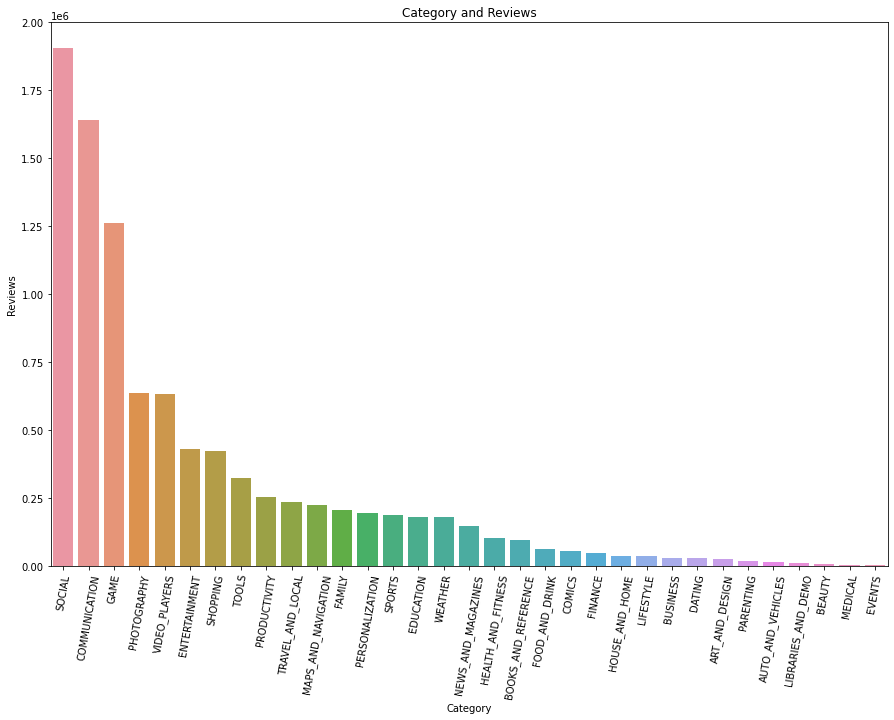

In [ ]:
#visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

## **Sentiment analysis of user reviews - BOX PLOT**
By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps.

In [ ]:
# Load user_reviews.csv
reviews_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone EDA/User Reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on='App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

FileNotFoundError: ignored

## **Content Rating**

Creating a pie chart to see the distribution of content rating

In [ ]:
# creating a copy of the data set
apps_1 = apps.copy() 

In [ ]:
#Analyse the Content Rating column
apps_1["Content Rating"].value_counts()

In [ ]:
#Remove the rows with values which are less represented 
apps_1 = apps_1[~apps_1["Content Rating"].isin(["Adults only 18+", "Unrated"])]
apps_1.shape

In [ ]:
#Reset the index
apps_1.reset_index(inplace=True, drop=True)
apps_1.info()

In [ ]:
#Check the apps belonging to different categories of Content Rating 
apps_1["Content Rating"].value_counts()

In [ ]:
#Plot a pie chart
#apps_1["Content Rating"].value_counts().plot.pie()
lab = apps_1["Content Rating"].unique() # for labels
plt.pie(apps_1["Content Rating"].value_counts(),#values
        labels = lab, #labels for legend
        autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        radius = 2.3) # Radius to increase or decrease the size of pie chart  
plt.legend() # To show legend
plt.show()


##Distribution of Ratings

In [ ]:
#creating distribution plot for ratings
plt.figure(figsize = (15,8))
sns.distplot(apps.Rating, bins=25)
plt.title("Distribution of App Ratings", fontsize=12)
plt.show()

## Distribution of Paid and Free apps

In [ ]:
apps.groupby(['Category','Type']).size().unstack().plot(kind='bar', stacked = True,figsize=(15,8))
#installs.mean().sort_values(ascending=False).plot(kind='bar',figsize=(10,10))
plt.ylabel('Count')
plt.show()

In [ ]:
apps.shape

**Number of apps in each categories**

In [ ]:
Number_of_apps_category_wise = apps.groupby(apps.Category).count().reset_index()
Number_of_apps_category_wise

**Plotting on horizontal bar graph**

[Text(0, 0.5, 'Categories'),
 Text(0.5, 0, 'No. of apps'),
 Text(0.5, 1.0, 'Categories v/s No. of apps')]

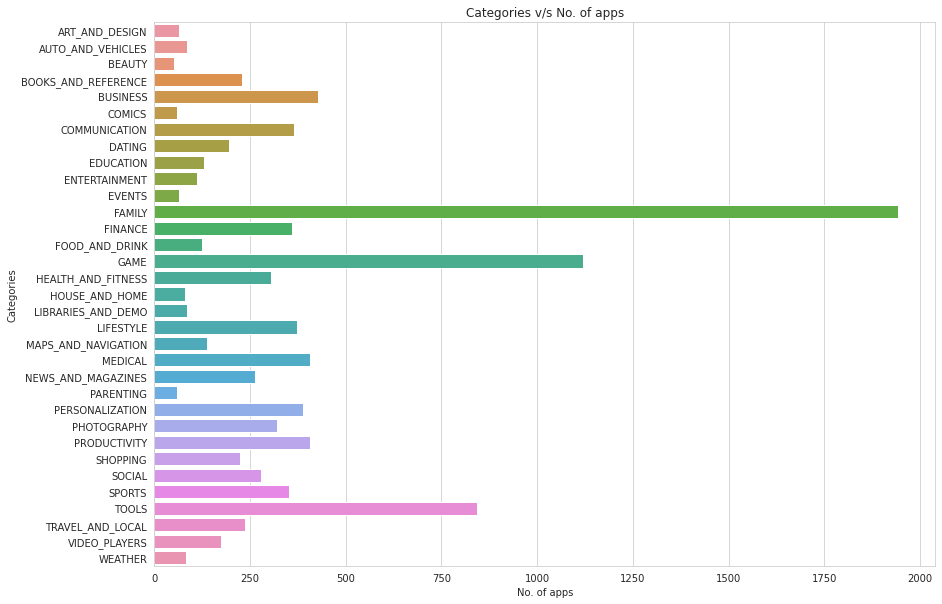

In [ ]:
Number_of_apps_category_wise
sns.set_style("whitegrid")
plt.figure(figsize=(14,10))
Number_of_apps_category_wise_graph_plot = sns.barplot(x="App",y="Category",data=Number_of_apps_category_wise)
Number_of_apps_category_wise_graph_plot.set(xlabel = 'No. of apps',ylabel = 'Categories', title = 'Categories v/s No. of apps')

**Conclusion - Family, Games and Tools are the top 3 Categories with maximum number of apps **

**We want to find out which Categories has most useful / Quality Apps**

In [ ]:
quality_of_apps_in_each_categories=pd.DataFrame()
quality_of_apps_in_each_categories["App"]=apps.App
quality_of_apps_in_each_categories["Quality"]=apps.Rating*apps.Installs
quality_of_apps_in_each_categories

In [ ]:
quantity_quality_df=pd.DataFrame()
quantity_quality_df["Category"]= Number_of_apps_category_wise.Category
quantity_quality_df["App VS Quantity"]= Number_of_apps_category_wise.App/Number_of_apps_category_wise.App.sum()
quantity_quality_df["App VS Quality"]=quality_of_apps_in_each_categories.Quality/quality_of_apps_in_each_categories.Quality.sum()

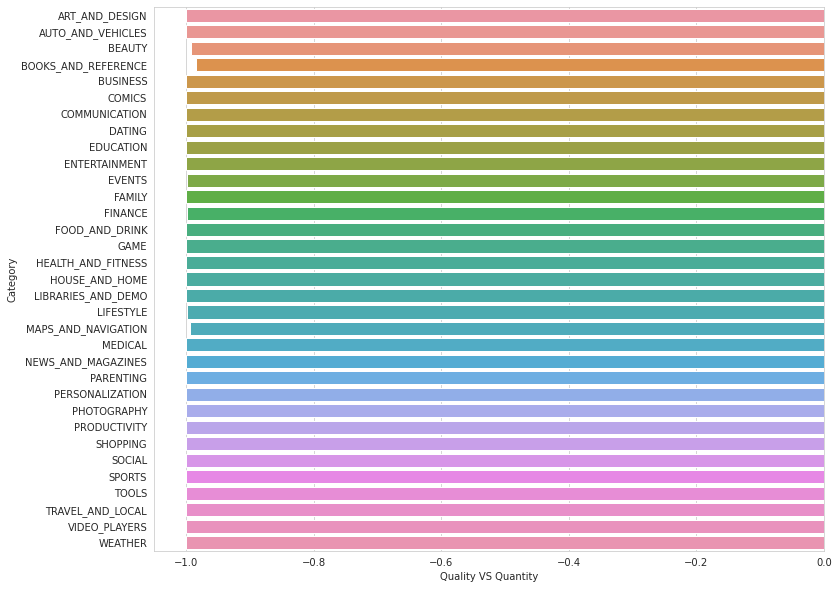

In [ ]:
quantity_quality_df["Quality VS Quantity"]=quantity_quality_df["App VS Quality"]/quantity_quality_df["App VS Quantity"]-1
plt.figure(figsize=(12,10))
sns.barplot(x="Quality VS Quantity",y="Category",data=quantity_quality_df);

# **CONCLUSION**

---


[Anupam]CONCLUSION-